In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
print("MISSING VALUES OF EACH COLUMN:\n\n",df.isnull().sum())

MISSING VALUES OF EACH COLUMN:

 Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [8]:
print('UNIQUE VALUES OF EACH COLUMN:\n ')
print(df.nunique())

UNIQUE VALUES OF EACH COLUMN:
 
Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


In [9]:
df_num = df.select_dtypes(include=[np.int64 , np.float64]).columns

In [10]:
df[df_num].nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
dtype: int64

In [11]:
df[df_num].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### Removing the null values

In [12]:
df.dropna(thresh=None,axis=0,inplace=True)

In [13]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [14]:
def plot_data(col):
    plt.figure(figsize=(10,5))
    sns.distplot(df[col])
    plt.show()
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col)
    plt.show()
    plt.scatter()
    print('Ratio/Share of each category: \n')
    print(df[col].value_counts(normalize=True))


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


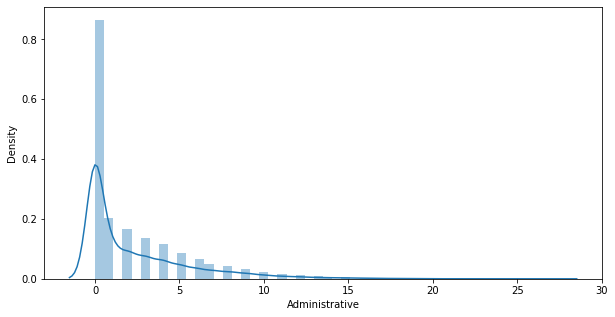

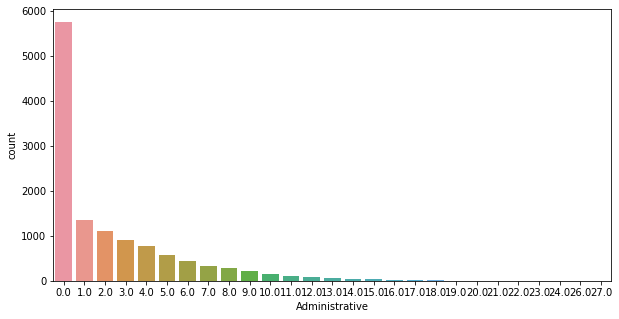

Ratio/Share of each category: 

0.0     0.467197
1.0     0.109938
2.0     0.090451
3.0     0.074294
4.0     0.062114
5.0     0.046687
6.0     0.035076
7.0     0.027444
8.0     0.023303
9.0     0.018269
10.0    0.012423
11.0    0.008525
12.0    0.006983
13.0    0.004547
14.0    0.003573
15.0    0.003085
16.0    0.001949
17.0    0.001299
18.0    0.000974
19.0    0.000487
24.0    0.000325
22.0    0.000325
23.0    0.000244
21.0    0.000162
20.0    0.000162
26.0    0.000081
27.0    0.000081
Name: Administrative, dtype: float64


In [15]:
plot_data('Administrative')

In [21]:
df['Administrative'].describe()

count    12316.000000
mean         2.317798
std          3.322754
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64

#### There are 27 types of page for Administrative (encoded). Most page visited was 0. This column is category which is encoded, data is skewed to right which shifts the mean to beomce greater than median & 56% of users visited the 0 and 1 page. We can see the standard deviation of this column is 3.32 which shows the data points vary on an average of 3.32 from mean

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


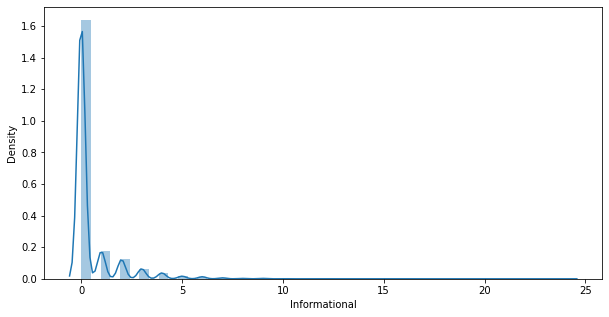

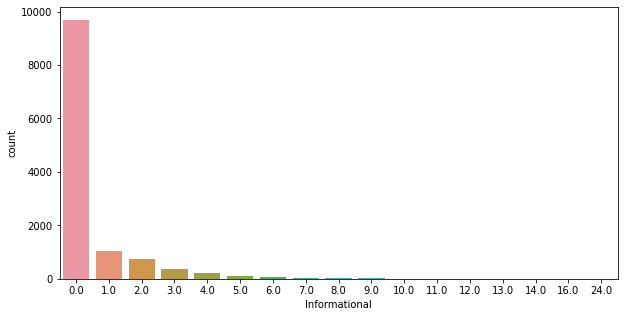

Ratio/Share of each category: 

0.0     0.786457
1.0     0.084524
2.0     0.059029
3.0     0.030854
4.0     0.018025
5.0     0.008038
6.0     0.006333
7.0     0.002923
9.0     0.001218
8.0     0.001137
10.0    0.000568
12.0    0.000406
14.0    0.000162
11.0    0.000081
24.0    0.000081
13.0    0.000081
16.0    0.000081
Name: Informational, dtype: float64


In [22]:
plot_data('Informational')

In [23]:
df['Informational'].describe()

count    12316.000000
mean         0.503979
std          1.270701
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Informational, dtype: float64

#### Most visited for Informational type of pages was 0 , almost 80%. The data is skewed to right, which is affecting the distribution of the data

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


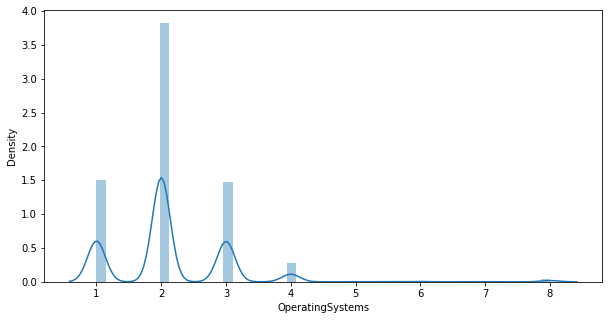

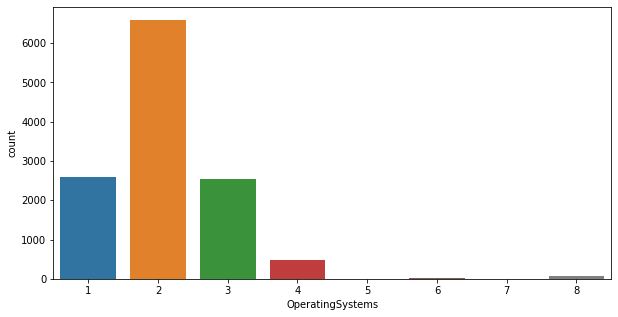

Ratio/Share of each category: 

2    0.535320
1    0.209646
3    0.207210
4    0.038811
8    0.006414
6    0.001543
7    0.000568
5    0.000487
Name: OperatingSystems, dtype: float64


In [15]:
plot_data('OperatingSystems')

#### Most operating system was used to visit the site was 2 . This column is also encoded

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


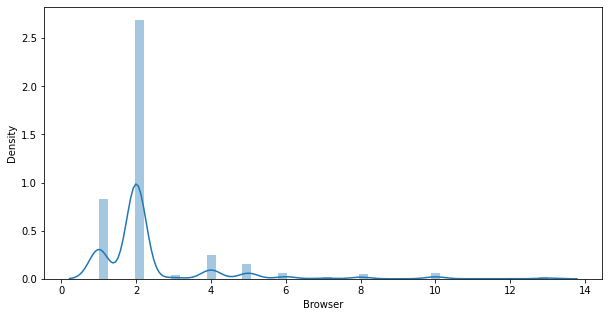

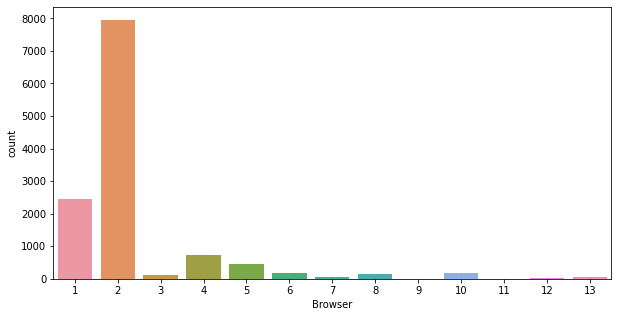

Ratio/Share of each category: 

2     0.645583
1     0.199659
4     0.059678
5     0.037918
6     0.014128
10    0.013235
8     0.010961
3     0.008525
13    0.004953
7     0.003979
12    0.000812
11    0.000487
9     0.000081
Name: Browser, dtype: float64


In [16]:
plot_data('Browser')

#### The Browser used most frequently to visit the site was 2

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


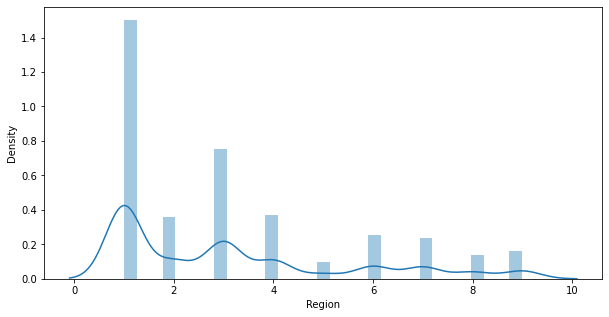

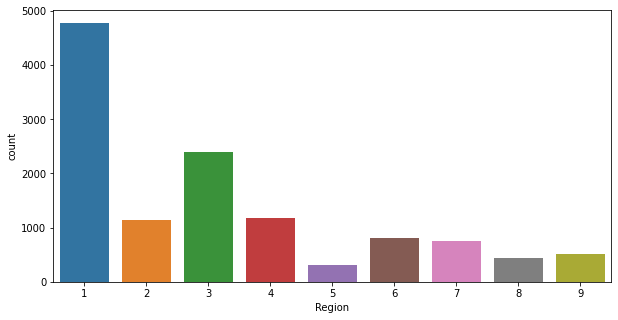

Ratio/Share of each category: 

1    0.387626
3    0.195031
4    0.095729
2    0.092075
6    0.065281
7    0.061790
9    0.041491
8    0.035239
5    0.025739
Name: Region, dtype: float64


In [17]:
plot_data('Region')

#### The distribution shows most of the users were from region 1, which can be used to focus on that region since almost 40% customers were from region 1. This insight can help to focus on region 1 or find the reason why other regions had such low visits

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


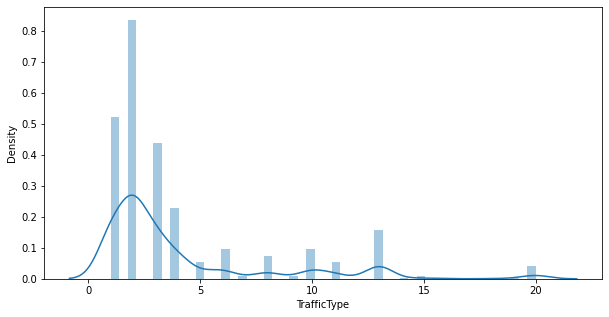

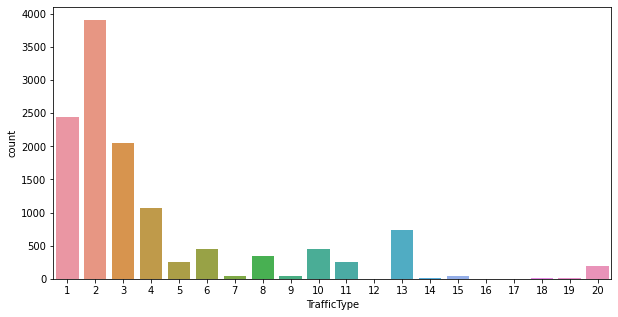

Ratio/Share of each category: 

2     0.317392
1     0.198441
3     0.166531
4     0.086798
13    0.059841
10    0.036538
6     0.036051
8     0.027850
5     0.021111
11    0.020055
20    0.016077
9     0.003410
7     0.003248
15    0.003004
19    0.001380
14    0.001056
18    0.000812
16    0.000244
12    0.000081
17    0.000081
Name: TrafficType, dtype: float64


In [24]:
plot_data('TrafficType')

In [25]:
df['TrafficType'].describe()

count    12316.000000
mean         4.070477
std          4.024598
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         20.000000
Name: TrafficType, dtype: float64

#### The most traffic for the user was categorized into is 2. The data is skewed to right. The standard deviation is 4.07 and the mean is 4.02 & according to the z-score table some of the point are outside the z-score of 3 , which may conclude that there may be an unsusual traffic

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


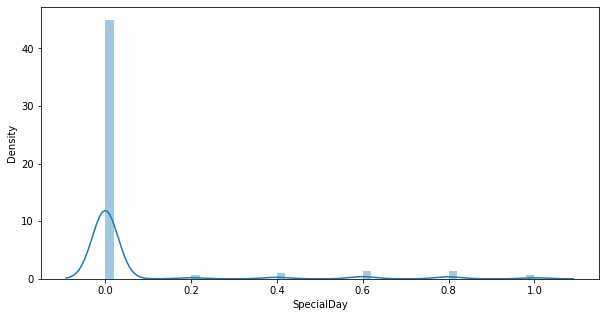

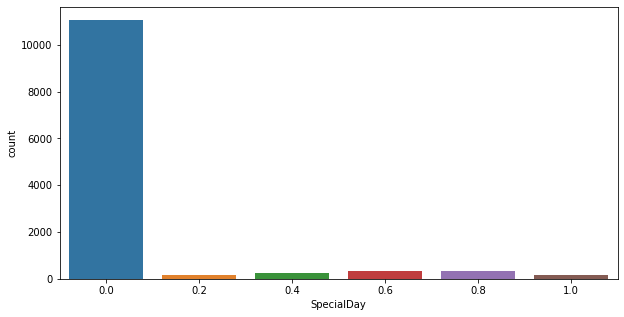

Ratio/Share of each category: 

0.0    0.898425
0.6    0.028500
0.8    0.026388
0.4    0.019730
0.2    0.014453
1.0    0.012504
Name: SpecialDay, dtype: float64


In [19]:
plot_data('SpecialDay')

#### The most visit was on special day '0'.

### Now we will try to check the distribution of continous values , since the above columns which were plotted were encoded

In [26]:
cols = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

<AxesSubplot:xlabel='PageValues', ylabel='Density'>

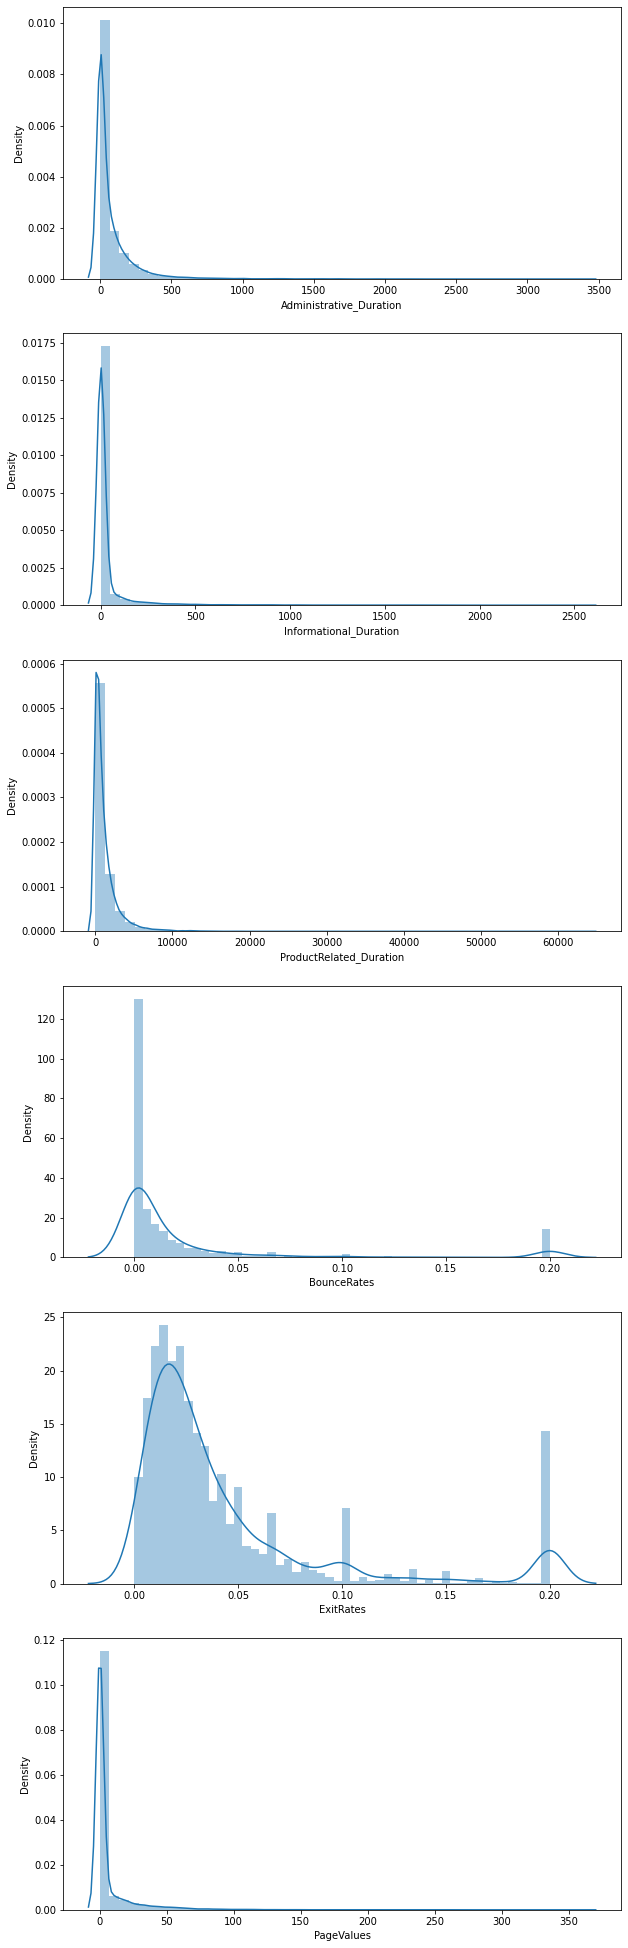

In [28]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=(10,35))
sns.distplot(df[cols[0]],ax=ax1)
sns.distplot(df[cols[1]],ax=ax2)
sns.distplot(df[cols[2]],ax=ax3)
sns.distplot(df[cols[3]],ax=ax4)
sns.distplot(df[cols[4]],ax=ax5)
sns.distplot(df[cols[5]],ax=ax6)
    
    

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

<AxesSubplot:xlabel='PageValues'>

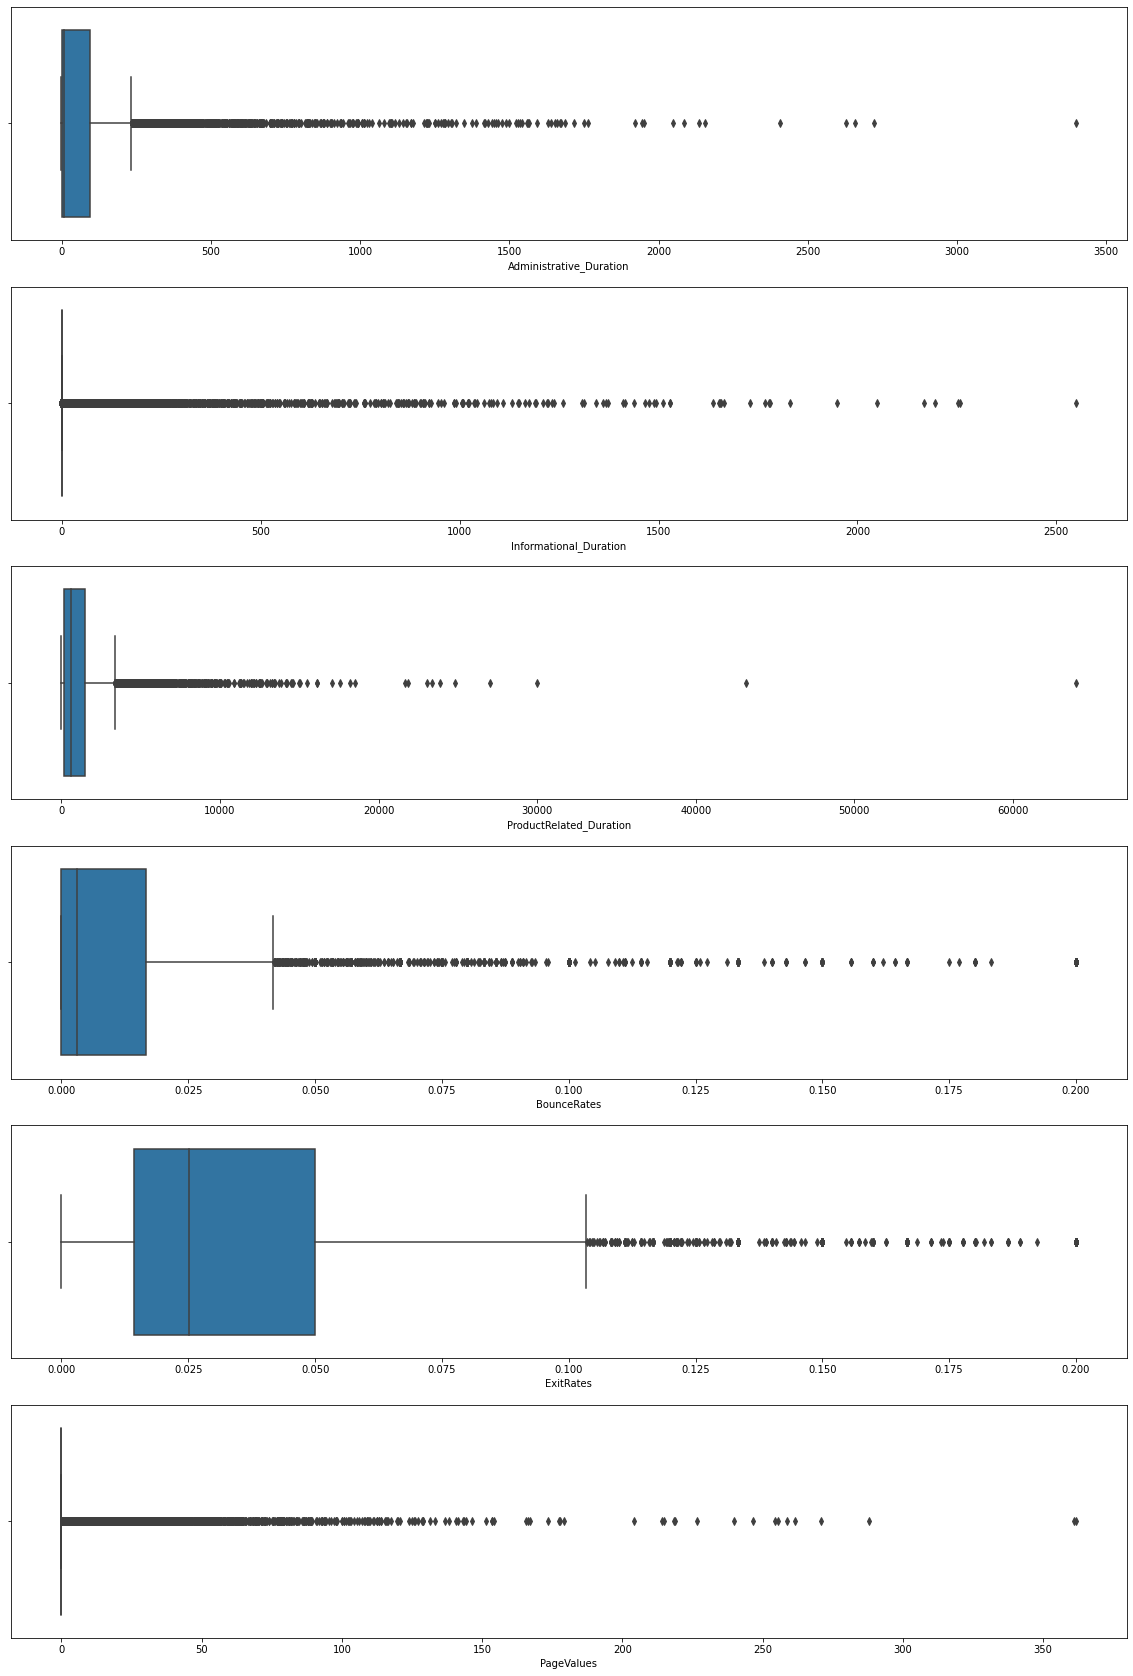

In [29]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=(20,30))
sns.boxplot(df[cols[0]],ax=ax1)
sns.boxplot(df[cols[1]],ax=ax2)
sns.boxplot(df[cols[2]],ax=ax3)
sns.boxplot(df[cols[3]],ax=ax4)
sns.boxplot(df[cols[4]],ax=ax5)
sns.boxplot(df[cols[5]],ax=ax6)
    

In [30]:
df[cols[:3]].describe()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration
count,12316.000000,12316.000000,12316.000000
mean,80.906176,34.506387,1196.037057
std,176.860432,140.825479,1914.372511
min,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,185.000000
50%,8.000000,0.000000,599.766190
75%,93.500000,0.000000,1466.479902
max,3398.750000,2549.375000,63973.522230


#### The distribution shows that these columns have a distribution skewed to right , which means the mean < median. These columns have certain outliers which indicates there might be an anamoly or they are outliers. Replacing them with or removing them might help to attain normal distribution.

In [31]:
df_cat = df.select_dtypes(include=(np.object,np.bool)).columns

In [32]:
df_cat

Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

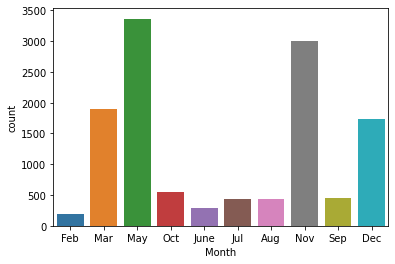

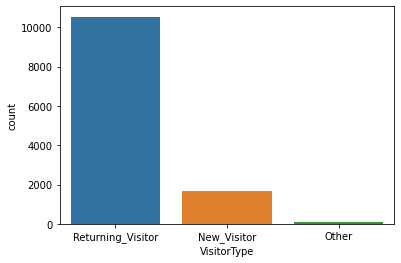

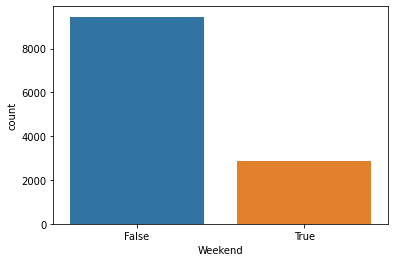

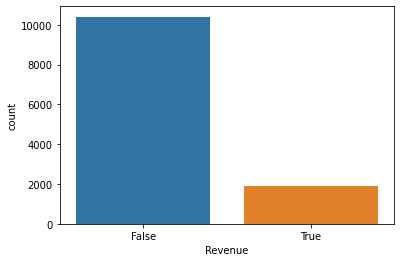

In [33]:
# fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,15))
for i in df_cat:
    sns.countplot(data=df,x=i)
    plt.show()

##### 1. Most visits were on weekdays.
##### 2. Most visits were in May followed by November and so on.
##### 3. Most visitors were of returning type

In [34]:
df['VisitorType'].value_counts(normalize=True)*100

Returning_Visitor    85.555375
New_Visitor          13.754466
Other                 0.690159
Name: VisitorType, dtype: float64

#### We can see 85% visitors were of returning category

#### We will check effect of visitor type on different columns

<AxesSubplot:xlabel='Administrative', ylabel='Administrative_Duration'>

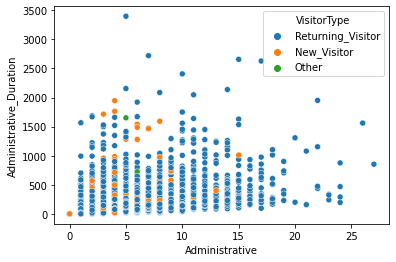

In [39]:
sns.scatterplot(data=df,x='Administrative',y='Administrative_Duration',hue='VisitorType')

#### We can see that most of the visitors spent less < 1500 . Although , there doest seem to be any relation between the features

<AxesSubplot:xlabel='Informational', ylabel='Informational_Duration'>

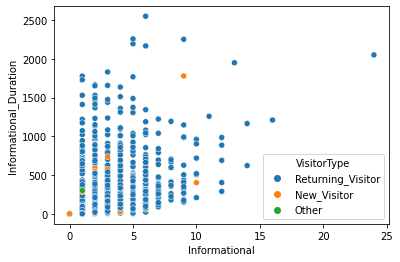

In [41]:
sns.scatterplot(data=df,x='Informational',y='Informational_Duration',hue='VisitorType')

<AxesSubplot:xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

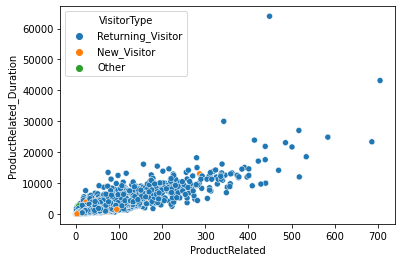

In [30]:
sns.scatterplot(data=df,x='ProductRelated',y='ProductRelated_Duration',hue='VisitorType')

#### The time spent by visitors on product related pages increases as the index of the product related pages increases. There exists a positive linear relationship 

<AxesSubplot:xlabel='Month', ylabel='count'>

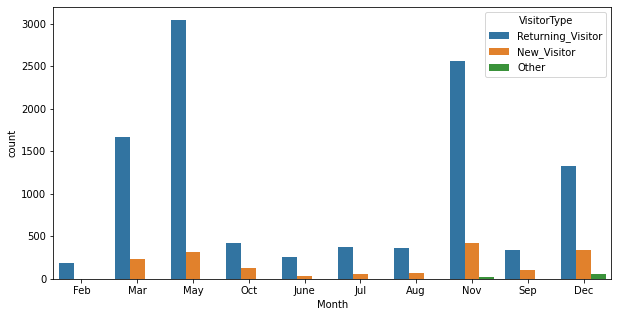

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Month',hue='VisitorType')

<AxesSubplot:xlabel='ExitRates', ylabel='BounceRates'>

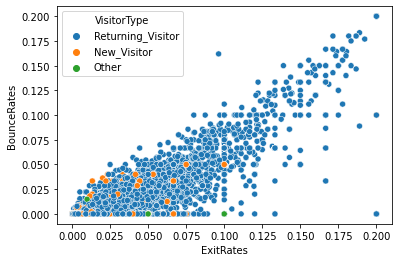

In [32]:
sns.scatterplot(data=df,x='ExitRates',y='BounceRates',hue='VisitorType')

#### There seems to be a moderate positive linear relationship between these features also

<AxesSubplot:xlabel='PageValues', ylabel='ExitRates'>

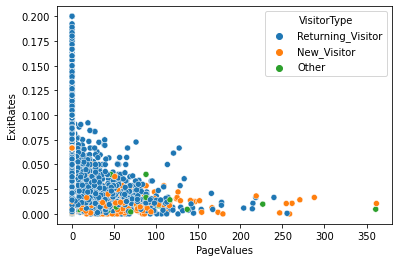

In [45]:
sns.scatterplot(data=df,x='PageValues',y='ExitRates',hue='VisitorType')

#### New visitors had higher page values than returning visitors i.e. They had a higher average value of visitng the web page before completing a transaction. Returning visitors had higher exit rates

<AxesSubplot:xlabel='ExitRates', ylabel='Administrative'>

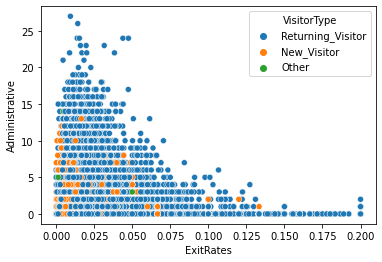

In [54]:
sns.scatterplot(data=df,x='ExitRates',y='Administrative',hue= 'VisitorType')

<AxesSubplot:xlabel='ExitRates', ylabel='Informational'>

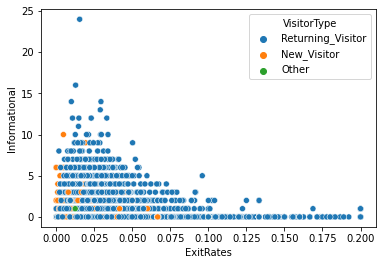

In [53]:
sns.scatterplot(data=df,x='ExitRates',y='Informational',hue= 'VisitorType')

<AxesSubplot:xlabel='ExitRates', ylabel='ProductRelated'>

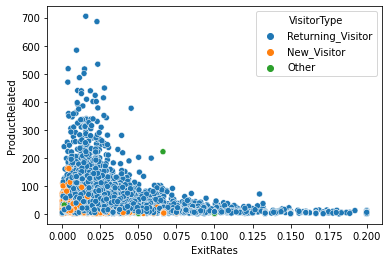

In [55]:
sns.scatterplot(data=df,x='ExitRates',y='ProductRelated',hue= 'VisitorType')

In [33]:
X = df.copy()

In [34]:
encoder = LabelEncoder()
X['VisitorType'] = encoder.fit_transform(X['VisitorType'])

In [35]:
X['Weekend'] = encoder.fit_transform(X['Weekend'])
X['Revenue'] = encoder.fit_transform(X['Revenue'])
X['Month'] = encoder.fit_transform(X['Month'])

<AxesSubplot:>

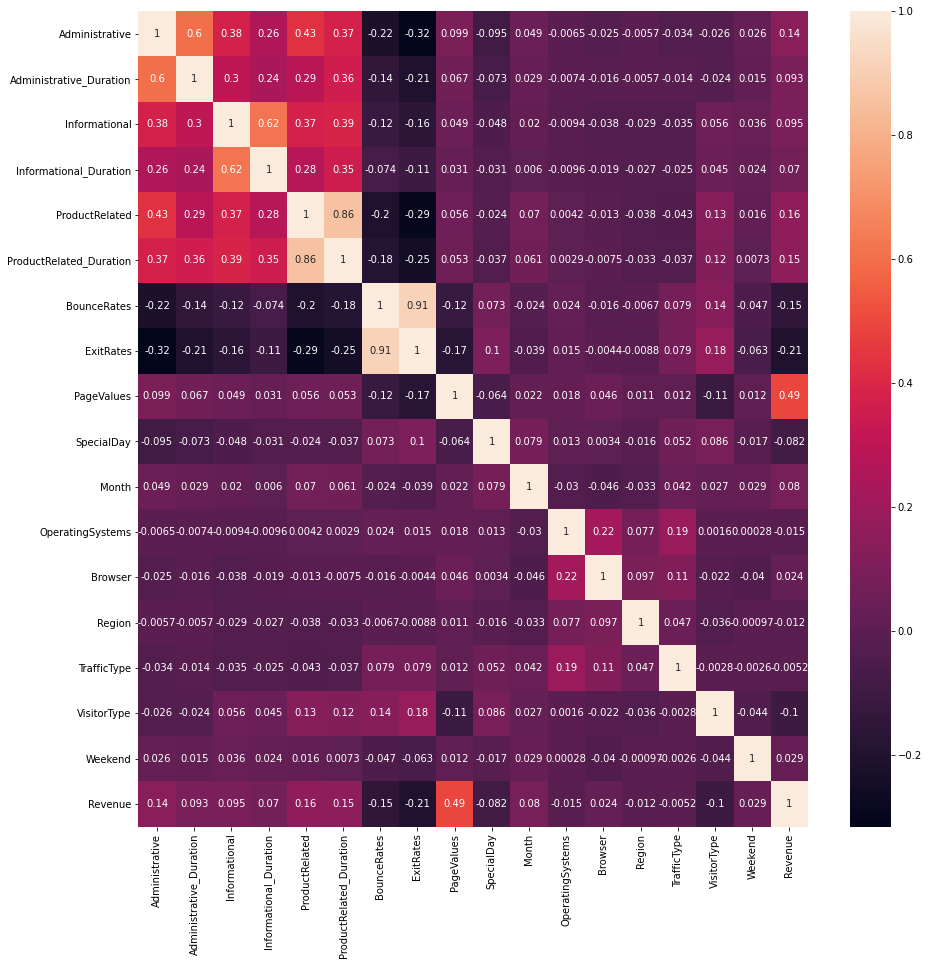

In [36]:
corr = X.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

#### We can see ProductRelated , ProductRelated_Duration, BounceRates, ExitRates, PageValues and Revenue has better correlation with VisitorType as compared to others